In [1]:
import scprep
import phate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from local_corex import LinearCorex, partition_data
from local_corex.utils import data as du, plotting as pu
from ucimlrepo import fetch_ucirepo 
  
bike_sharing = fetch_ucirepo(id=275) 

bikes = bike_sharing.data['original']
def assign_hr_bin(hour):
    if 4 <= hour < 10:
        return '4-10'
    elif 10 <= hour < 16:
        return '10-16'
    elif 16 <= hour < 22:
        return '16-22'
    else:
        return '22-4'

bikes['hr_bin'] = bikes['hr'].apply(assign_hr_bin)
bikes = pd.get_dummies(bikes, columns=['mnth', 'weekday', 'weathersit', 'hr_bin'], drop_first=False)
bikes.drop(columns=['season', 'instant', 'dteday', 'hr'], inplace=True)
bikes

Install CUDA and cudamat (for python) to enable GPU speedups.


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,hr_bin_10-16,hr_bin_16-22,hr_bin_22-4,hr_bin_4-10
0,0,0,0,0.24,0.2879,0.81,0.0000,3,13,16,...,0,1,1,0,0,0,0,0,1,0
1,0,0,0,0.22,0.2727,0.80,0.0000,8,32,40,...,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0.22,0.2727,0.80,0.0000,5,27,32,...,0,1,1,0,0,0,0,0,1,0
3,0,0,0,0.24,0.2879,0.75,0.0000,3,10,13,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0.24,0.2879,0.75,0.0000,0,1,1,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.2576,0.60,0.1642,11,108,119,...,0,0,0,1,0,0,0,1,0,0
17375,1,0,1,0.26,0.2576,0.60,0.1642,8,81,89,...,0,0,0,1,0,0,0,1,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,7,83,90,...,0,0,1,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2727,0.56,0.1343,13,48,61,...,0,0,1,0,0,0,0,0,1,0


Calculating PHATE...
  Running PHATE on 17379 observations and 37 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.51 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.59 seconds.
  Calculating landmark operator...
    Calculating SVD...


c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 18 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 1.13 seconds.
    Calculating KMeans...


c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\tkerby2\AppData\Roaming\uv\python\cpython-3.11.13-windows-x86_64-none\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tkerby2\AppData\Roaming\uv\python\cpython-3.11.13-windows-x86_64-none\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(a

    Calculated KMeans in 2.13 seconds.
  Calculated landmark operator in 3.59 seconds.
  Calculating optimal t...
    Automatically selected t = 78
  Calculated optimal t in 1.76 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.67 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.95 seconds.
Calculated PHATE in 9.57 seconds.


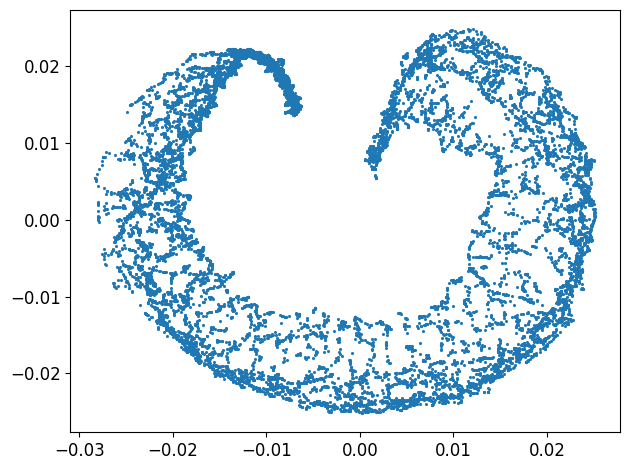

<Axes: >

In [2]:
phate_operator = phate.PHATE(n_components=2, n_jobs=-2, random_state=42)
Y_phate_2d = phate_operator.fit_transform(bikes)
scprep.plot.scatter2d(Y_phate_2d)

In [4]:
num_clusters = 12
indexes, pred = partition_data(bikes, n_partitions=num_clusters, phate_dim=10, n_jobs=-2, seed=42, return_pred=True)

Calculating PHATE...
  Running PHATE on 17379 observations and 37 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.50 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Calculating landmark operator...
    Calculating SVD...


c:\Users\tkerby2\Desktop\Research\Local_CorEx\.venv\Lib\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 18 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated SVD in 1.49 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.00 seconds.
  Calculated landmark operator in 3.84 seconds.
  Calculating optimal t...
    Automatically selected t = 78
  Calculated optimal t in 1.78 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.68 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 100.70 seconds.
Calculated PHATE in 107.59 seconds.


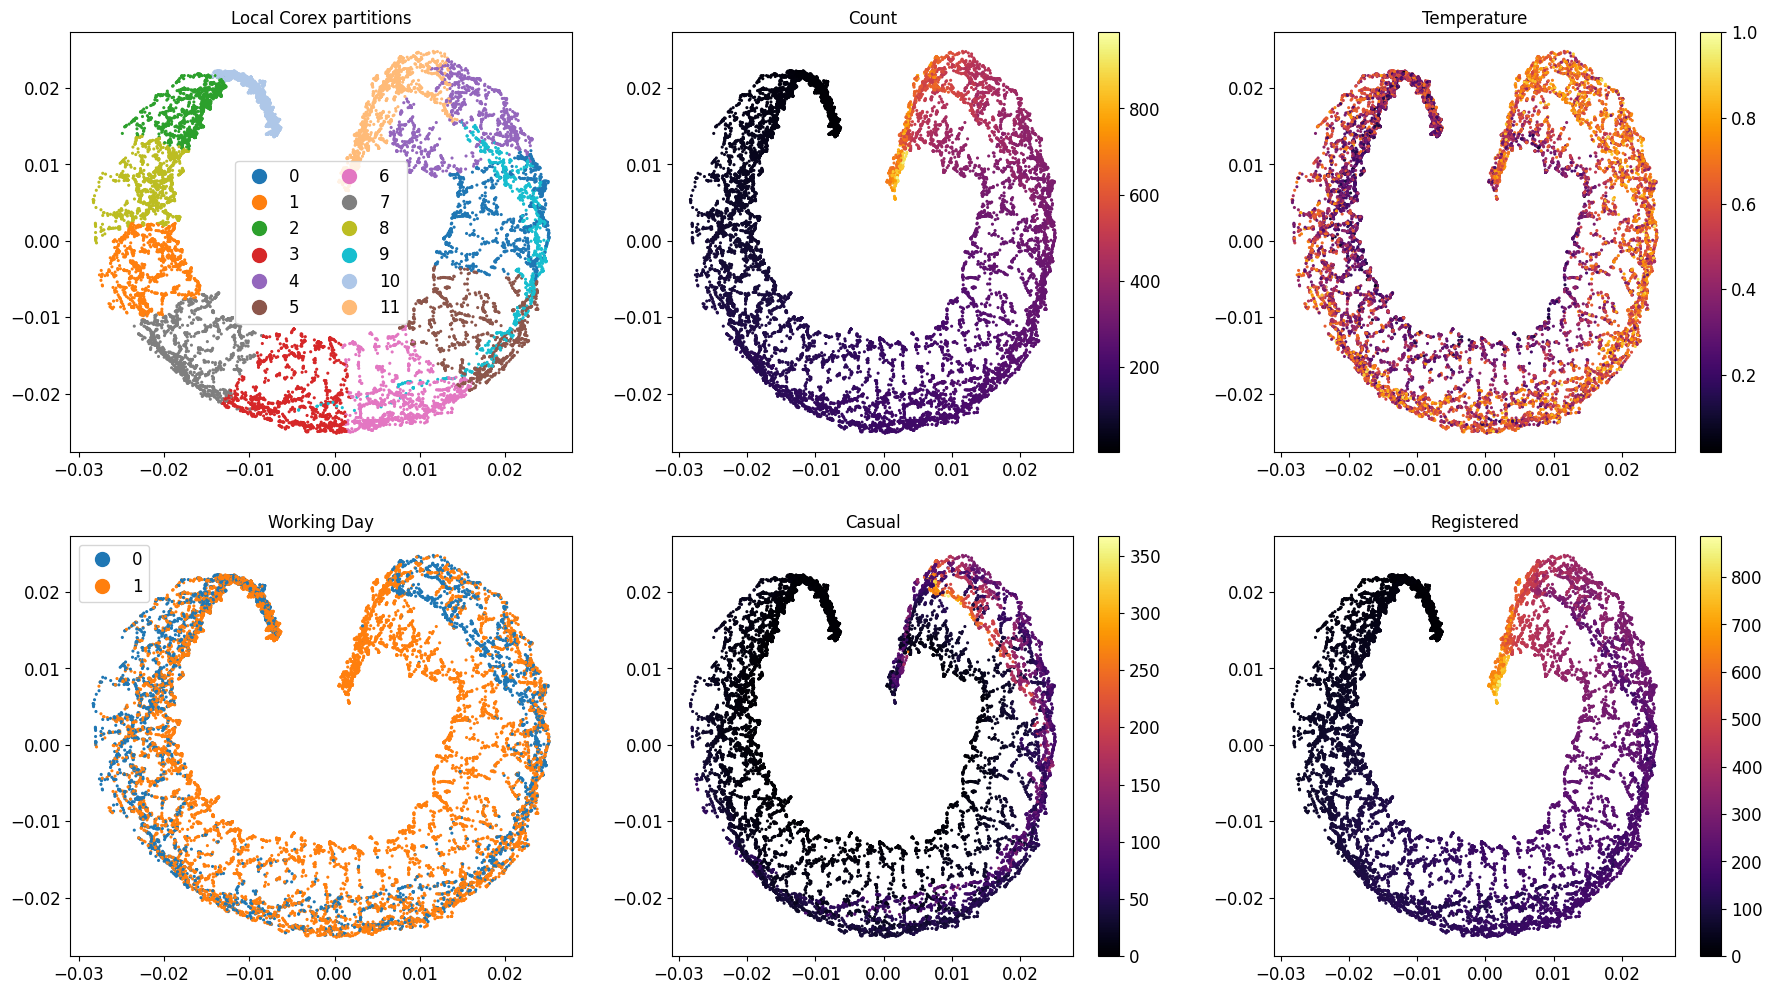

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))
scprep.plot.scatter2d(Y_phate_2d, c=pred, ax=axes[0,0])
axes[0,0].set_title("Local Corex partitions")
scprep.plot.scatter2d(Y_phate_2d, c=bikes['cnt'], ax=axes[0,1])
axes[0,1].set_title("Count")
scprep.plot.scatter2d(Y_phate_2d, c=bikes['temp'], ax=axes[0,2])
axes[0,2].set_title("Temperature")
scprep.plot.scatter2d(Y_phate_2d, c=bikes['workingday'], ax=axes[1,0])
axes[1,0].set_title("Working Day")
scprep.plot.scatter2d(Y_phate_2d, c=bikes['casual'], ax=axes[1,1])
axes[1,1].set_title("Casual")
scprep.plot.scatter2d(Y_phate_2d, c=bikes['registered'], ax=axes[1,2])
axes[1,2].set_title("Registered")
plt.show()

## Explore Cluster 9

In [6]:
du.explore_cluster(bikes, indexes[9], 20)

casual          1.723636
hr_bin_10-16    0.943703
workingday     -0.903001
temp            0.812872
atemp           0.790805
cnt             0.703041
hum            -0.570863
weekday_6       0.565406
weekday_0       0.556164
hr_bin_22-4    -0.553375
hr_bin_4-10    -0.500751
mnth_7          0.327964
weekday_3      -0.312522
weekday_2      -0.307074
mnth_1         -0.284215
mnth_12        -0.283162
registered      0.281051
weekday_4      -0.246727
mnth_2         -0.238625
weathersit_1    0.224878
dtype: float64


In [7]:
model_9 = LinearCorex(n_hidden=8, seed=42)
Y1_0 = model_9.fit_transform(bikes.loc[indexes[9]])

print(model_9.tcs)

[ 1.6345780e+00  1.0889466e+00  1.0762835e+00  9.8162484e-01
  5.3697252e-01  4.9892879e-01  2.6027113e-01 -7.0512295e-04]


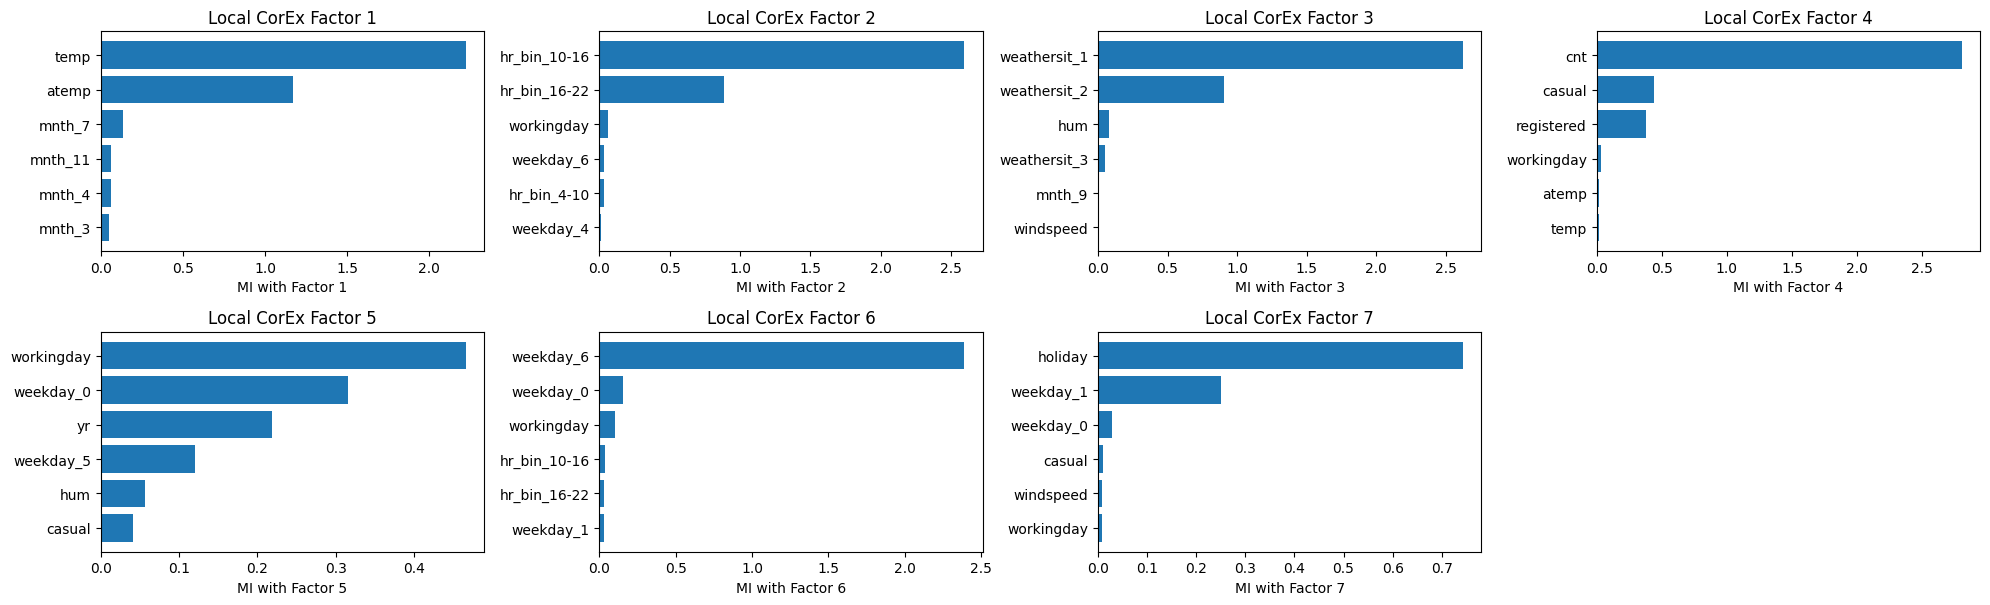

In [8]:
pu.plot_n_factors(model_9, bikes, n=7, n_vals=6, cols=4)

## Explore Cluster 0

In [9]:
du.explore_cluster(bikes, indexes[0], 20)

registered      0.743299
cnt             0.652160
hr_bin_22-4    -0.541411
hr_bin_16-22    0.527615
workingday      0.401202
yr              0.293160
atemp           0.290366
temp            0.274330
weekday_6      -0.258936
weekday_0      -0.226736
hum            -0.225068
mnth_1         -0.160708
weathersit_3   -0.152499
weekday_4       0.143226
weekday_3       0.134688
weekday_2       0.131015
casual          0.117431
hr_bin_4-10     0.108707
mnth_9          0.098091
hr_bin_10-16   -0.096738
dtype: float64


In [10]:
model_0 = LinearCorex(n_hidden=10, seed=42)
Y1_0 = model_0.fit_transform(bikes.loc[indexes[0]])

print(model_0.tcs)

[2.660474   1.0989091  0.92818546 0.49453402 0.46343207 0.39145422
 0.13756025 0.12286782 0.05715734 0.04574758]


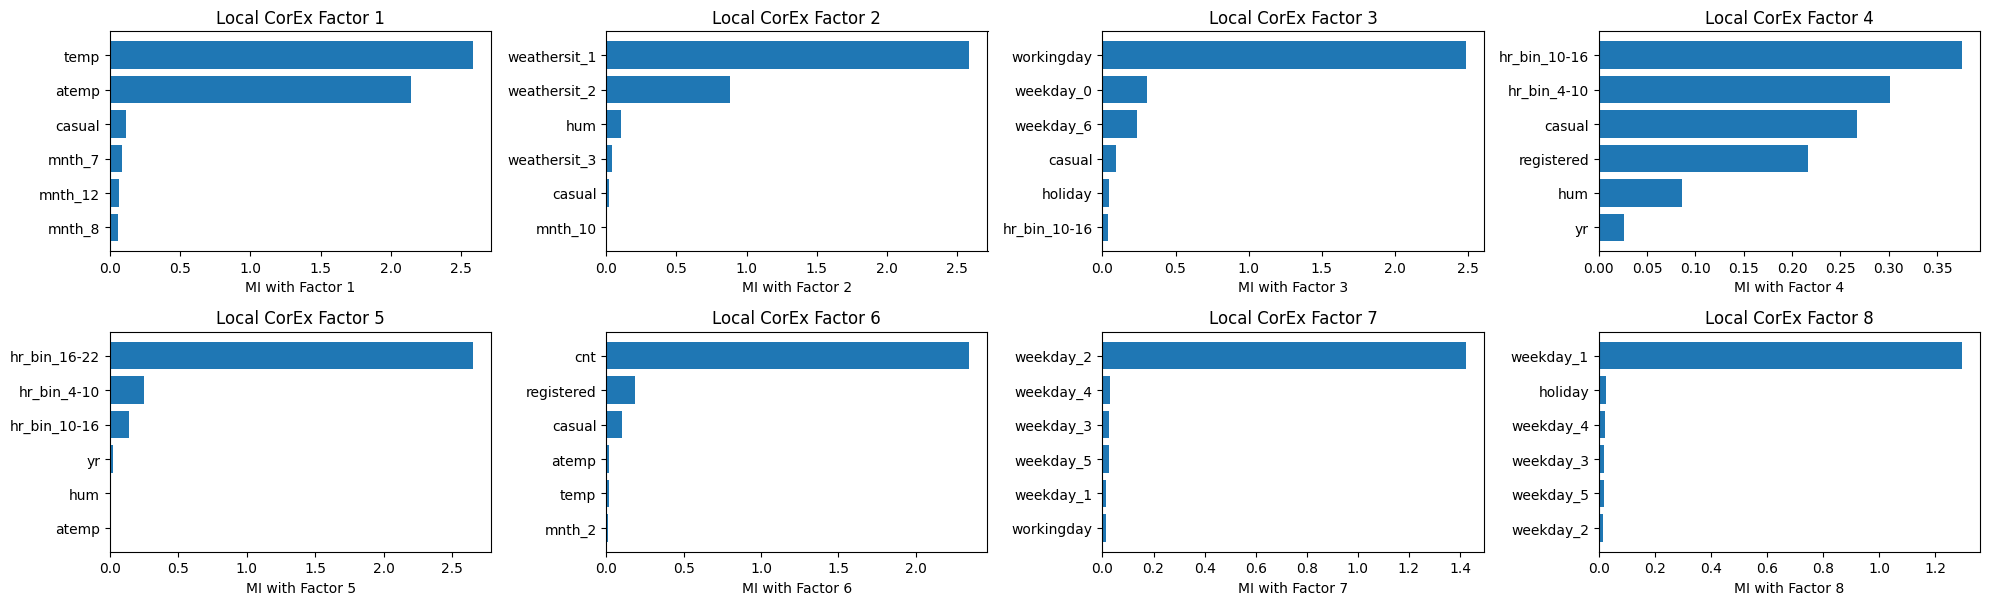

In [11]:
pu.plot_n_factors(model_0, bikes, n=8, n_vals=6, cols=4)

## Explore full data

In [12]:
model_all = LinearCorex(n_hidden=8, seed=42)
Y1_0 = model_all.fit_transform(bikes)

print(model_all.tcs)

[ 2.5758018   2.217197    0.7743273   0.698256    0.30774057  0.17250025
  0.13495982 -0.07632411]


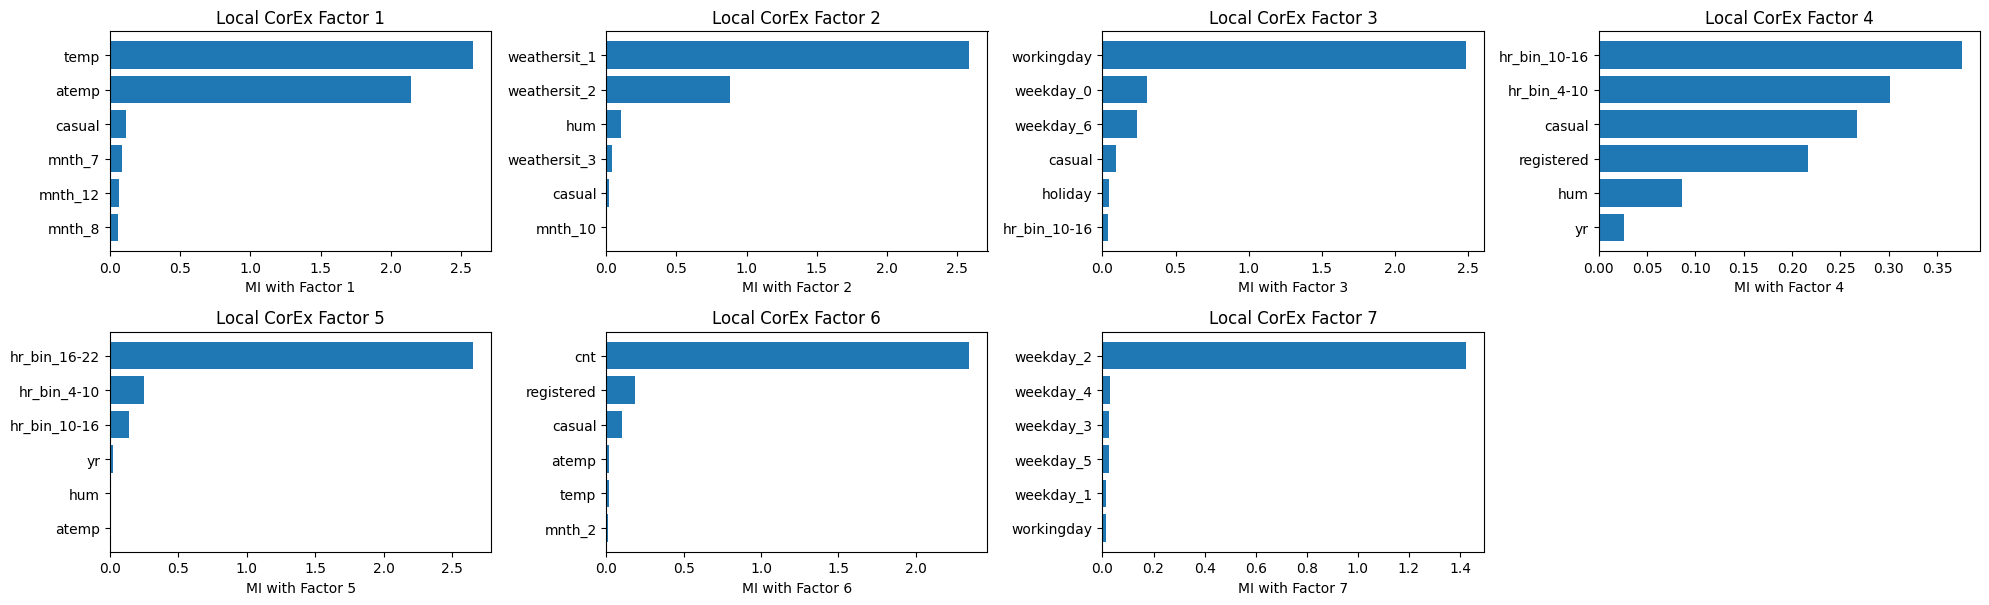

In [13]:
pu.plot_n_factors(model_0, bikes, n=7, n_vals=6, cols=4)

## Comparing HOIs

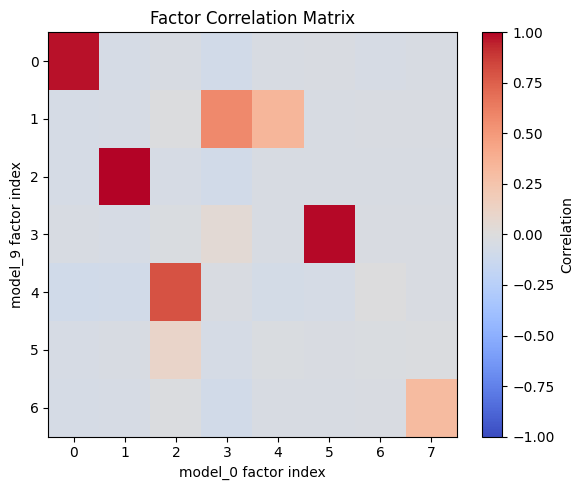

In [14]:
pu.generate_sim_matrix(model_9, model_0, n_components_1=7, n_components_2=8, model_1_title='model_9', model_2_title='model_0')

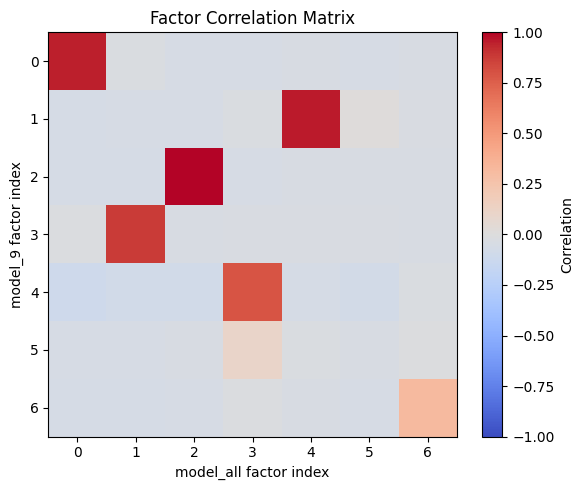

In [15]:
pu.generate_sim_matrix(model_9, model_all, n_components_1=7, n_components_2=7, model_1_title='model_9', model_2_title='model_all')

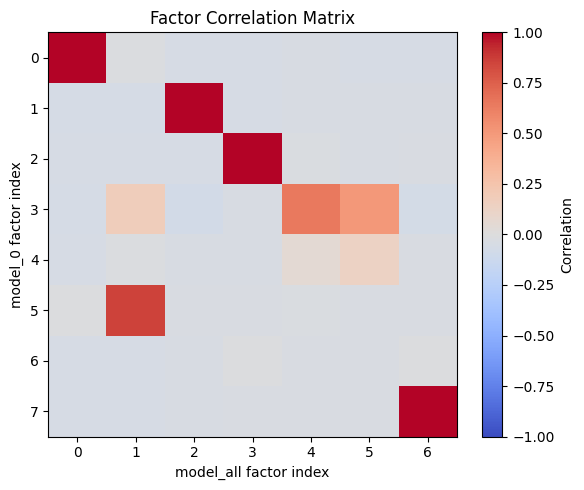

In [16]:
pu.generate_sim_matrix(model_0, model_all, n_components_1=8, n_components_2=7, model_1_title='model_0', model_2_title='model_all')